# Air transportation Ocurrences
## Summary Analysis 

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import sys
sys.path.append("../scripts")

In [10]:
#Load data
from data_loader import load_data_from_csv, load_data_from_temp
from common.export_csv import exportDataVersion

In [11]:
df = load_data_from_csv('fullData_V2.csv')
#Data length
print(f"# of rows 'fullData_V2.csv': {len(df)}")

# of rows 'fullData_V2.csv': 47791


In [12]:
print(df['Summary'])

0        C-IICE a privately operated Quad City Challeng...
1        C-GWCP a Piper PA-32-300 aircraft operated by ...
2        C-FKCK an Airbus 320-200 aircraft operated by ...
3        C-GJVC a Fairchild SA227-DC aircraft operated ...
4        C-GGSV an Aerospatiale AS 350 B-2 aircraft ope...
                               ...                        
47786    A76A0021: THE HARBOUR AREA WAS CLEAR TO THE NO...
47787    SHORTLY AFTER TAKE-OFF THE COCKPIT FILLED WITH...
47788    DURING TAKE-OFF FROM A BEACH AREA WHICH WAS HA...
47789    DURING TAKE-OFF IN GUSTY WIND CONDITIONS THE A...
47790    AFTER 45 MINUTES OF FLIGHT DURING WHICH TWO SL...
Name: Summary, Length: 47791, dtype: object


In [15]:
!pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 21.4 MB/s eta 0:00:00MB/s eta 0:00:01


In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X.toarray())  # Convert sparse matrix to dense

# Create a scatter plot with a single color for all data points
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='gray', alpha=0.7)  # Single color
plt.title('Visualization of Data Before Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

NameError: name 'X' is not defined

In [ ]:
print(df.columns)

In [17]:
# Ensure no NaN values and convert text to lowercase
df['Cleaned_Summary'] = df['Summary'].fillna('').str.lower()

# Remove punctuation
import string
df['Cleaned_Summary'] = df['Cleaned_Summary'].str.translate(str.maketrans('', '', string.punctuation))


In [34]:
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already done
nltk.download('stopwords')

# Remove stopwords
stop = set(stopwords.words('english'))
df['Cleaned_Summary'] = df['Cleaned_Summary'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop])
)

[nltk_data] Downloading package stopwords to /Users/aryan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
# Combine all text in the Cleaned_Summary column
text = ' '.join(df['Cleaned_Summary'].dropna())

In [20]:
!pip install nltk

In [18]:
!pip install wordcloud


In [36]:
from wordcloud import WordCloud
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

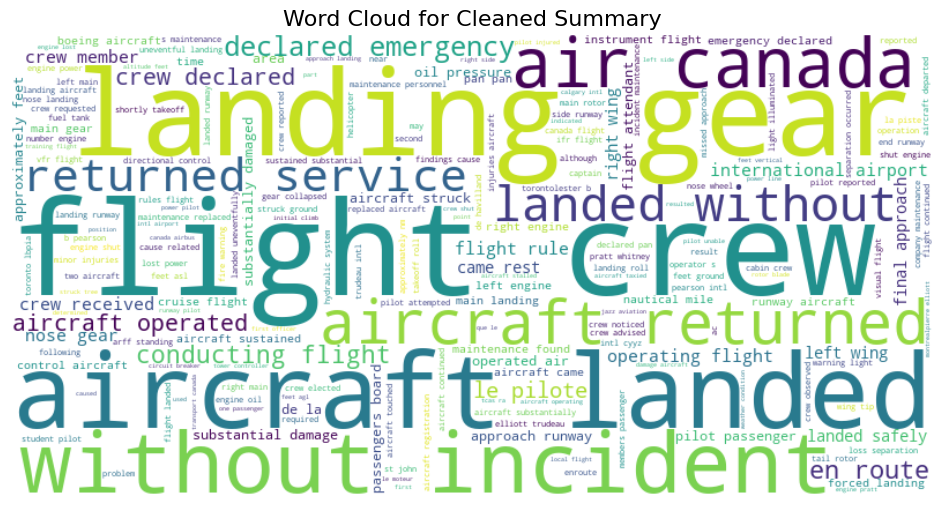

In [37]:
import matplotlib.pyplot as plt
# Display the word cloud
plt.figure(figsize=(20, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud for Cleaned Summary', fontsize=16)
plt.show()

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Use top 1000 features
X = vectorizer.fit_transform(df['Cleaned_Summary'])

# Check the shape of the resulting matrix (rows = number of samples, columns = features)
print(f"TF-IDF matrix shape: {X.shape}")


TF-IDF matrix shape: (47791, 1000)


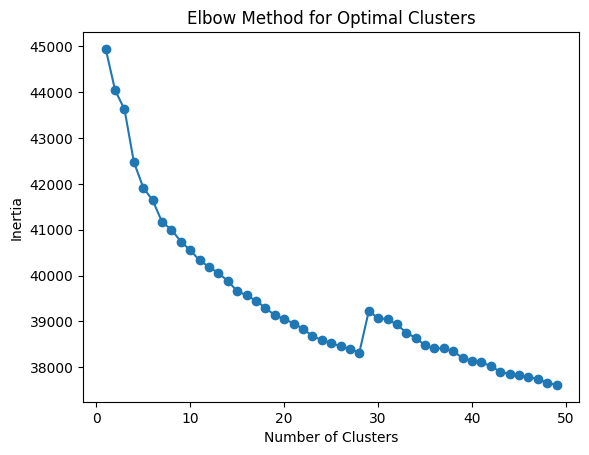

In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate inertia for different cluster numbers
inertia = []
k_values = range(1, 50)  # Try from 1 to 10 clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # X is your TF-IDF matrix
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
k_values = range(2, 11)  # Start from 2 clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # X is your TF-IDF matrix
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Check the first few rows with cluster assignments
print(df[['Cleaned_Summary', 'Cluster']].head())


In [ ]:
# Inspect sample rows for each cluster
for cluster_id in df['Cluster'].unique():
    print(f"\nCluster {cluster_id}:")
    print(df[df['Cluster'] == cluster_id]['Cleaned_Summary'].head(10))


In [ ]:
# Define a mapping for clusters based on observed patterns
cluster_mapping = {
    0: "Crash",
    1: "Near Miss",
    2: "No Crash",
    3: "Mechanical Issue",
    4: "Other Incident"
}

# Map cluster labels to descriptive names
df['Incident_Type'] = df['Cluster'].map(cluster_mapping)

# Check the updated DataFrame
print(df[['Cleaned_Summary', 'Cluster', 'Incident_Type']].head())


In [ ]:
# Review the mapping for each cluster
for cluster_id in df['Cluster'].unique():
    print(f"\nCluster {cluster_id} - Incident Type: {cluster_mapping[cluster_id]}")
    print(df[df['Cluster'] == cluster_id][['Cleaned_Summary', 'Incident_Type']].head(5))


In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
k_values = range(2, 11)  # Start from 2 clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # X is your TF-IDF matrix
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Generate the TF-IDF matrix from the Cleaned_Summary column
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X = vectorizer.fit_transform(df['Cleaned_Summary'])



In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X.toarray())

# Scatter plot for clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [ ]:
print(df['Cluster'].value_counts())


In [ ]:
# Save the updated DataFrame to a CSV file
df.to_csv('updated_fullData_V2.csv', index=False)

print("Updated DataFrame saved as 'updated_fullData_V2.csv'")


In [33]:
import os
print(os.getcwd())


/Users/aryan/Desktop/DA Project/DataAnalysisProject/notebooks


In [ ]:
# # Reload the saved CSV file to check its content
# import pandas
# df_check = pandas.read_csv('updated_fullData_V2.csv')
# print(df_check.head())


In [ ]:
exportDataVersion(df, 3)